## The dataset: mtcars

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

In [3]:
#read the dataset
df = pd.read_csv('https://raw.githubusercontent.com/Explore-AI/Public-Data/master/Data/regression_sprint/mtcars.csv', index_col=0)
df.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
model,,,,,,,,,,,
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [4]:
df.shape

(32, 11)

## Modelling miles per gallon
Let's attempt to model the miles per gallon (mpg) rating of a car using its other characteristics. mpg is an intuitive response variable and we would expect it to be negatively impacted by things like a heavier car (wt), higher horsepower (hp),and bigger engine displacement (disp), among other things.

To start with, we'll carry out this multiple linear regression in sklearn.

To get a better idea of what a multi-dimensional dataset looks like, we'll generate a 3D scatter plot showing the mpg on the z-axis, with two predictor variables, cyl and disp on the x- and y-axes.

<IPython.core.display.Javascript object>


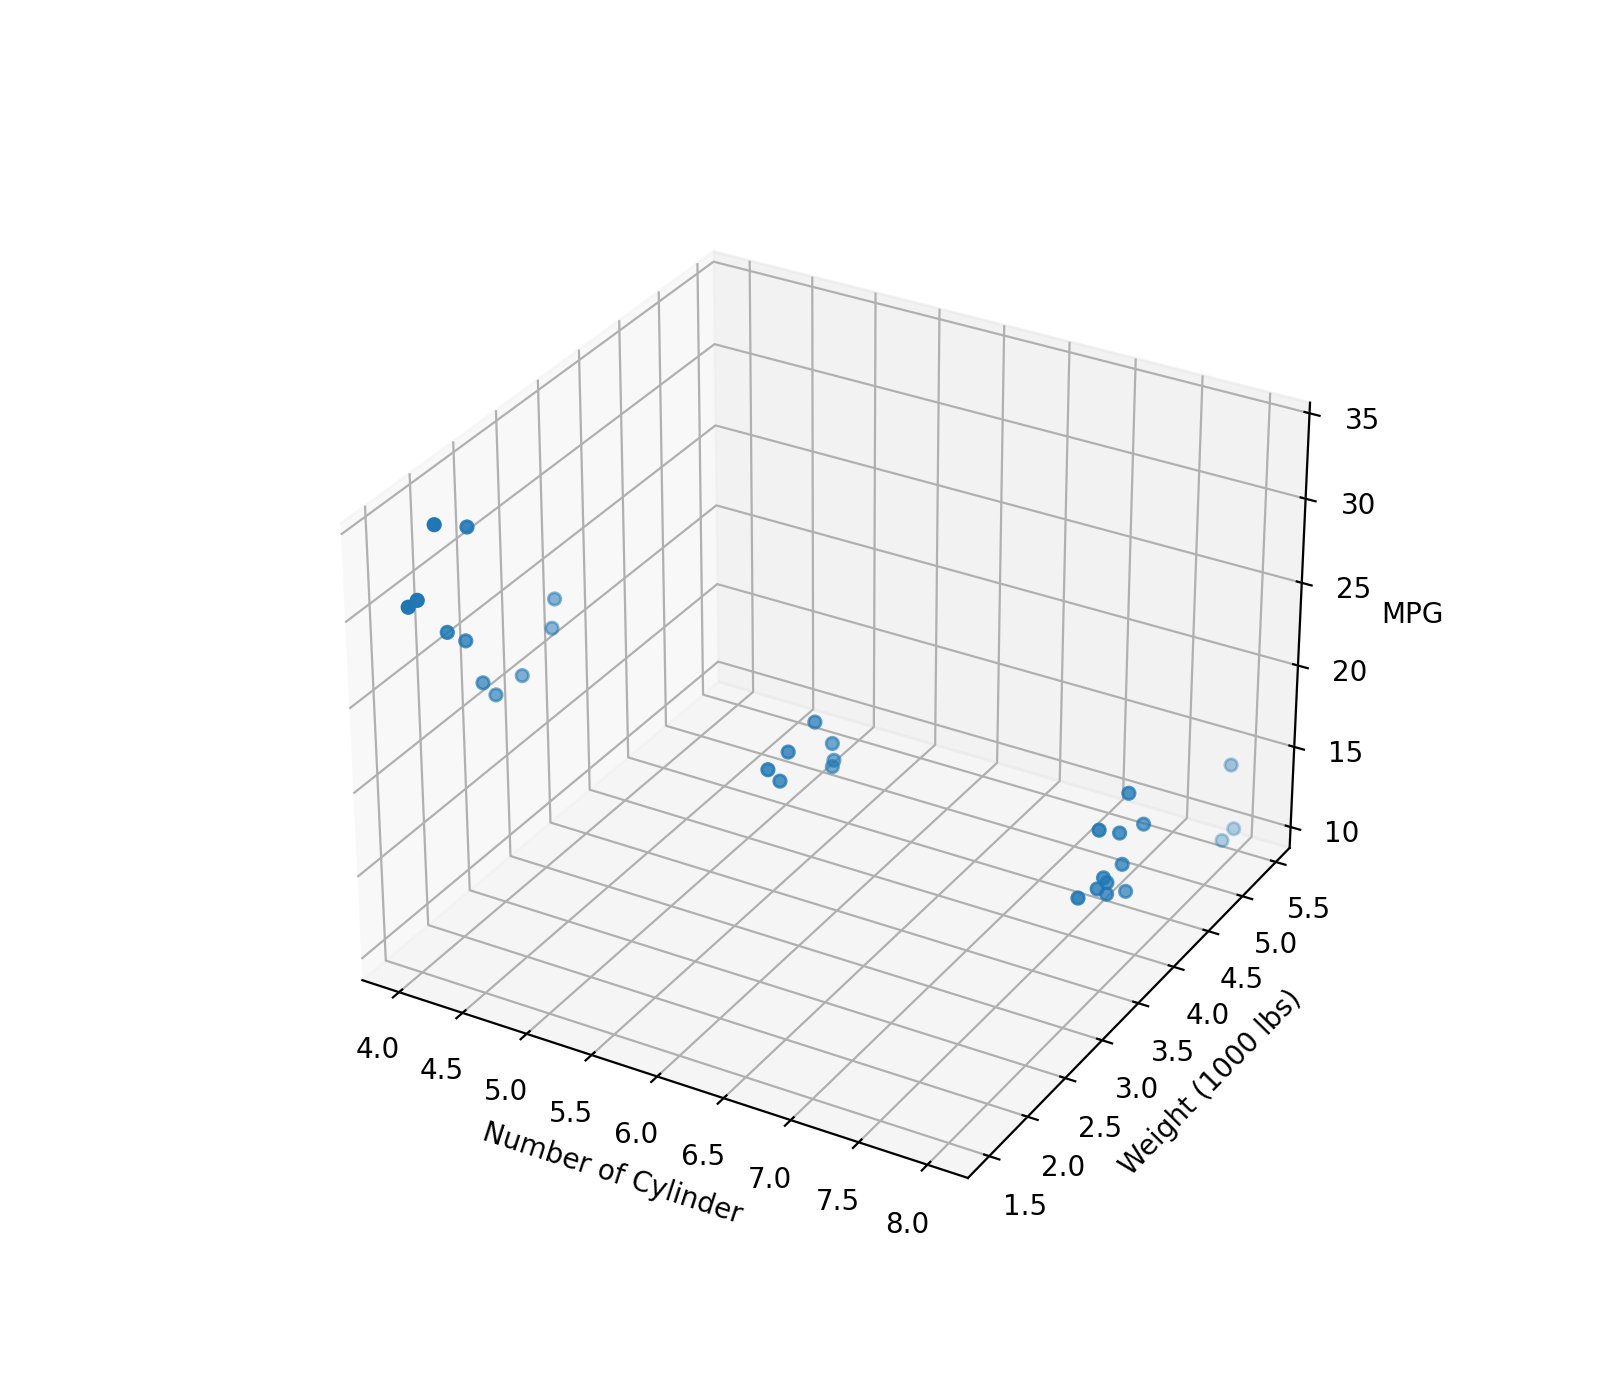

In [7]:
fig = plt.figure(figsize=(8,7))
ax  = fig.add_subplot(111,projection='3d')

# set axi axis label
ax.set_zlabel('MPG') 
ax.set_xlabel('Number of Cylinder')
ax.set_ylabel('Weight (1000 lbs)')
# Scatter plot with response variable and 2 predicator
ax.scatter(df['cyl'],df['wt'],df['mpg']);

## Fitting a multivariate regression model
In sklearn, fitting a multiple linear regression model is similar to fitting a simple linear regression. This time, of course, our  𝑋
  contains multiple columns, where it only contained one before

# Y = B0 +B1X1+ B2X2 +B3X3 ------+ BpXP

In [9]:
#import regression model
from sklearn.linear_model import LinearRegression
#Spite predicator and response 
X = df.drop(['mpg'],axis=1)
y = df['mpg']

In [10]:
# create model object
lm = LinearRegression()

In [11]:
# import train/test split model
from sklearn.model_selection import train_test_split

In [12]:
X_train,X_test,y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=1)

In [13]:
#train the model
lm.fit(X_train,y_train)

LinearRegression()

In [14]:
beta_0 = lm.intercept_
beta_0

8.465282572242591

In [15]:
beta_js = pd.DataFrame(lm.coef_,X.columns, columns=['Coefficient'])
beta_js

,Coefficient
cyl,0.190203
disp,0.008613
hp,-0.022868
drat,1.477014
wt,-3.564785
qsec,0.924358
vs,-1.248904
am,1.340890
gear,0.482458
carb,-0.187354


<IPython.core.display.Javascript object>


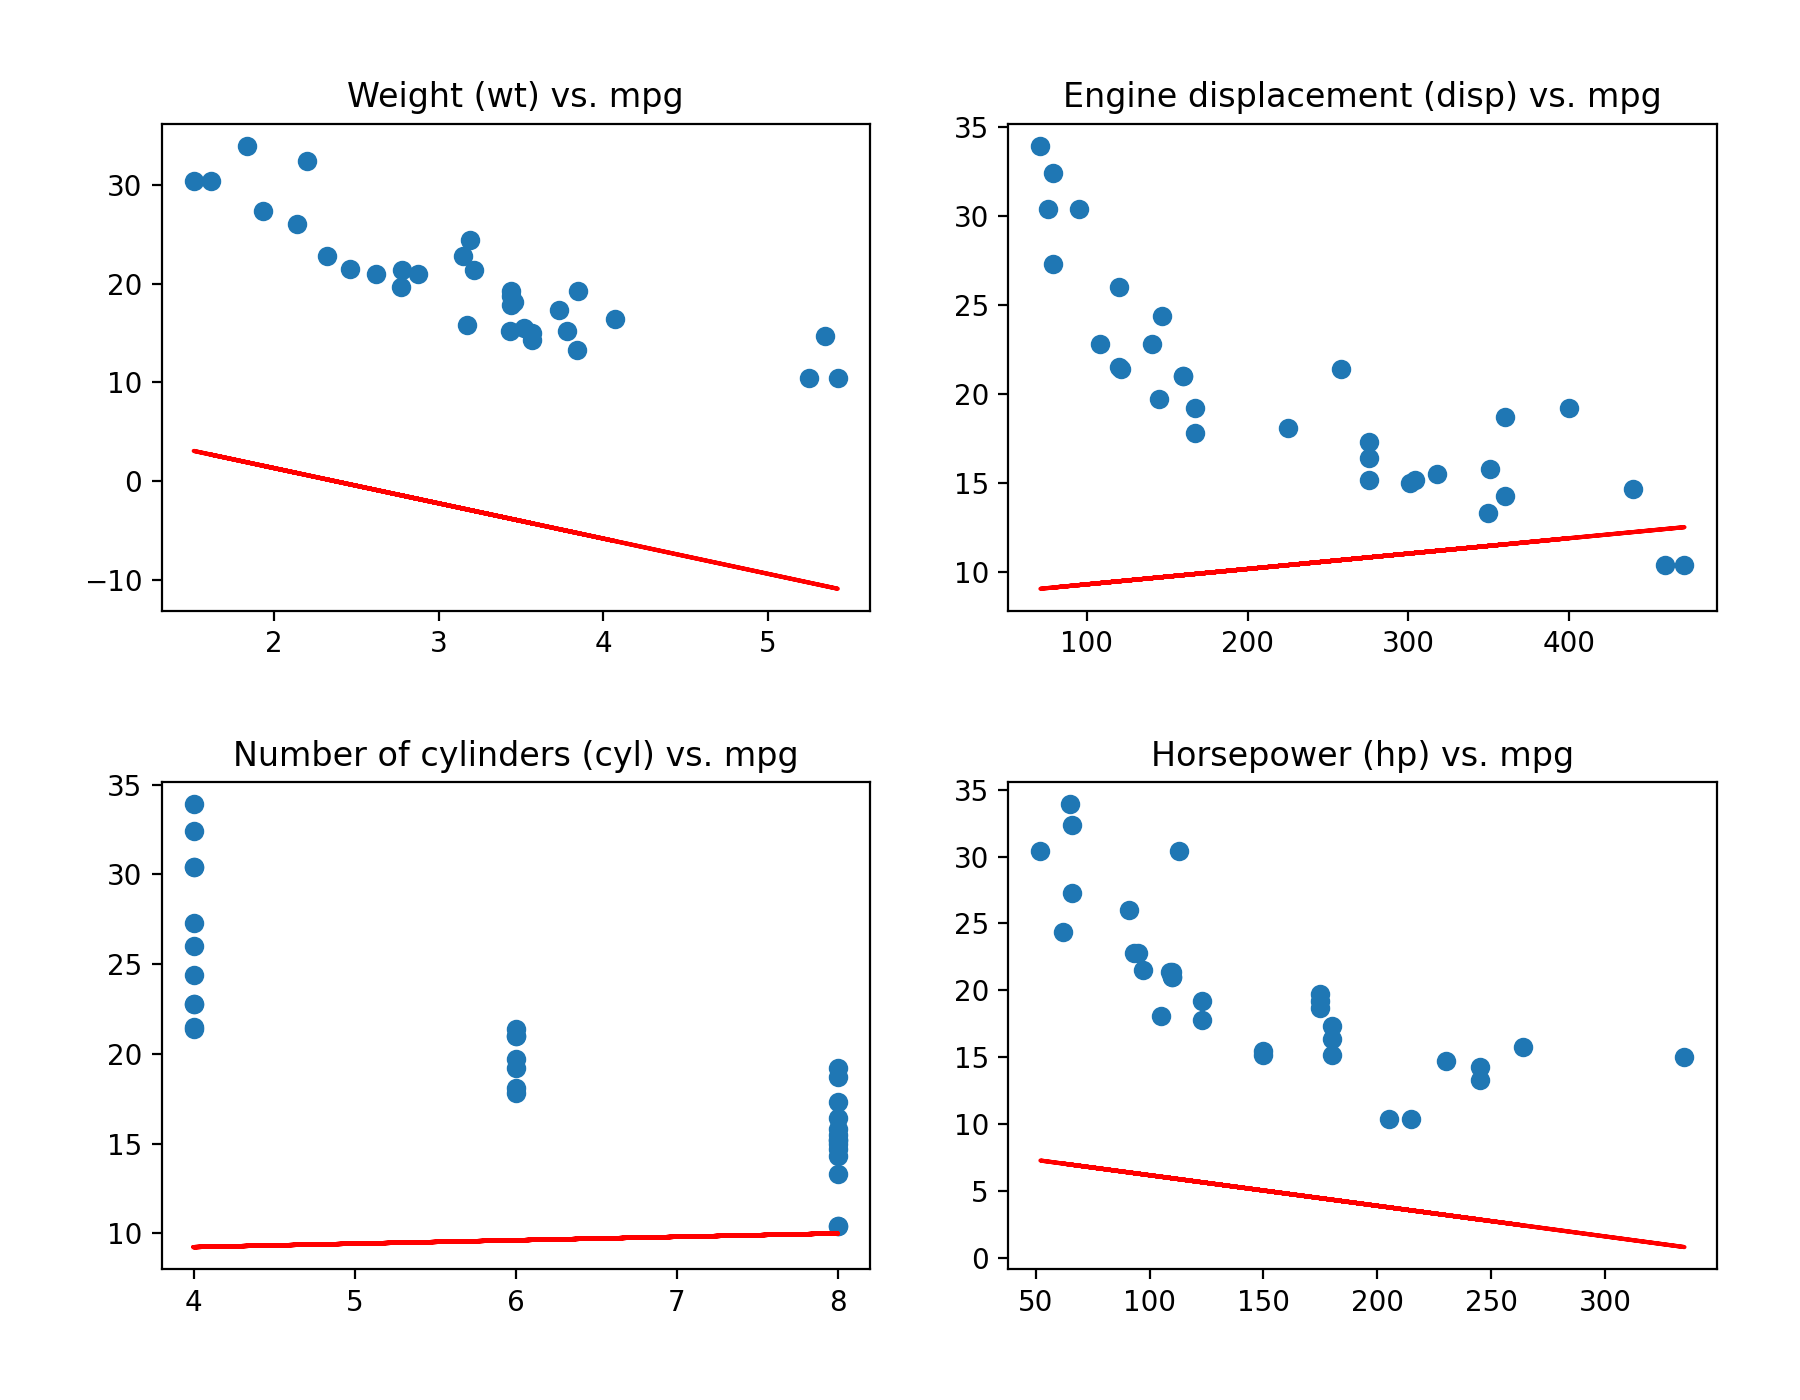

In [20]:
fig, axs = plt.subplots(2, 2, figsize=(9,7))

axs[0,0].scatter(df['wt'], df['mpg'])
axs[0,0].plot(df['wt'], lm.intercept_ + lm.coef_[4]*df['wt'], color='red')
axs[0,0].title.set_text('Weight (wt) vs. mpg')

axs[0,1].scatter(df['disp'], df['mpg'])
axs[0,1].plot(df['disp'], lm.intercept_ + lm.coef_[1]*df['disp'], color='red')
axs[0,1].title.set_text('Engine displacement (disp) vs. mpg')

axs[1,0].scatter(df['cyl'], df['mpg'])
axs[1,0].plot(df['cyl'], lm.intercept_ + lm.coef_[0]*df['cyl'], color='red')
axs[1,0].title.set_text('Number of cylinders (cyl) vs. mpg')

axs[1,1].scatter(df['hp'], df['mpg'])
axs[1,1].plot(df['hp'], lm.intercept_ + lm.coef_[2]*df['hp'], color='red')
axs[1,1].title.set_text('Horsepower (hp) vs. mpg')

fig.tight_layout(pad=3.0)

plt.show()

## Assessing model accuracy¶
Let's assess the fit of our multivariate model. For a rudimentary comparison, let's measure model accuracy against a simple linear regression model that uses only disp as a predictor variable for mpg.

In [28]:
#comparison linerModel
slr = LinearRegression()
slr.fit(X_train[['disp']],y_train)

LinearRegression()

In [29]:
from sklearn import metrics
import math

Let's calculate the training Mean Squared Error (MSE), test MSE, and test Root Mean Squared Error (RMSE) for both our Simple Linear Regression (SLR) and Multiple Linear Regression (MLR) models.

In [30]:
# dict result
results_dict = {'Training MSE':
                    {
                        "SLR": metrics.mean_squared_error(y_train, slr.predict(X_train[['disp']])),
                        "MLR": metrics.mean_squared_error(y_train, lm.predict(X_train))
                    },
                'Test MSE':
                    {
                        "SLR": metrics.mean_squared_error(y_test, slr.predict(X_test[['disp']])),
                        "MLR": metrics.mean_squared_error(y_test, lm.predict(X_test))
                    },
                'Test RMSE':
                    {
                        "SLR": math.sqrt(metrics.mean_squared_error(y_test, slr.predict(X_test[['disp']]))),
                        "MLR": math.sqrt(metrics.mean_squared_error(y_test, lm.predict(X_test)))
                    }
                }


In [31]:
# create dataframe from dictionary
results_df = pd.DataFrame(data=results_dict)

In [32]:
results_df

,Training MSE,Test MSE,Test RMSE
SLR,8.201521,20.500165,4.527711
MLR,3.737534,11.520901,3.394245
